
# OpenVTO custom clothes styling example

In [1]:
import openvto

import base64
from IPython.display import display, HTML
from dotenv import load_dotenv
load_dotenv()

True

## Initialize Client

Create a default OpenVTO client. It is configured to use these models from Google Vertex AI:
- gemini-3-pro-image-preview (Nano Banana Pro) - High quality image generation
- veo-3.1-fast-generate-preview (VEO 3.1 Fast) - Quality / cost-effective video generation

In [2]:
vto = openvto.OpenVTO()

print(f"Provider: {vto.provider_name}")
print(f"Image model: {vto.image_model}")
print(f"Video model: {vto.video_model}")

Provider: google
Image model: gemini-3-pro-image-preview
Video model: veo-3.1-fast-generate-preview


# Part 1: Generate Avatar
## Step 1: Load Input Images

We need two images to create an avatar.

Let's use the example included in the package:
1. **Selfie** — A clear face photo for identity
2. **Posture** — A full-body image showing the desired pose


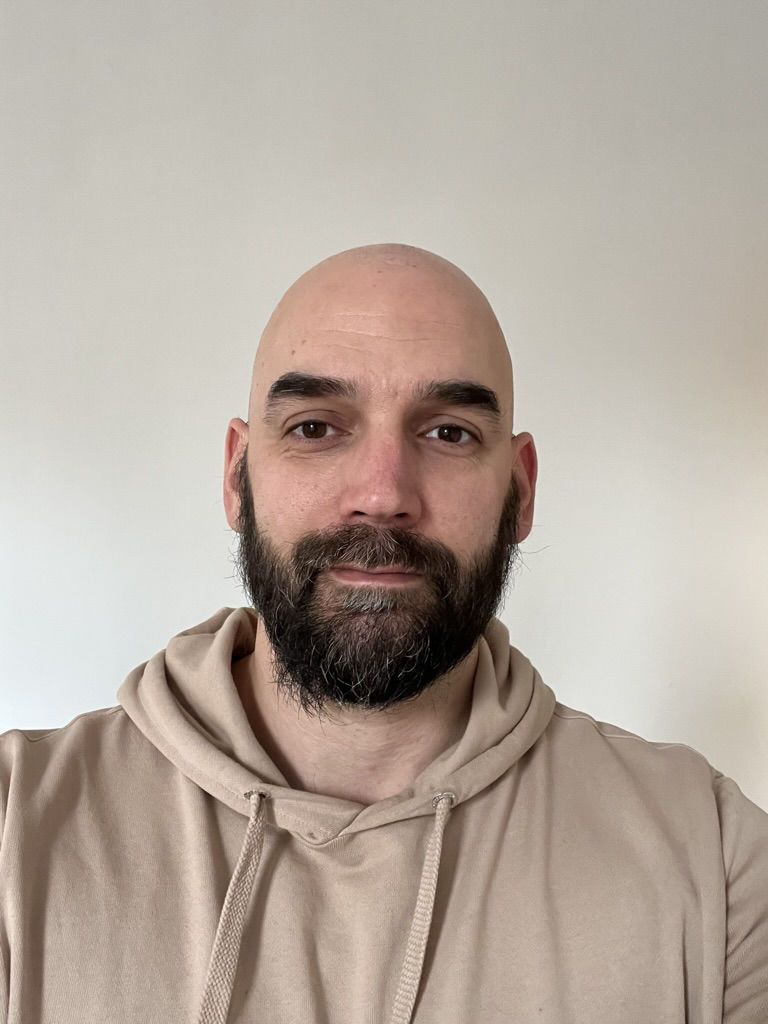

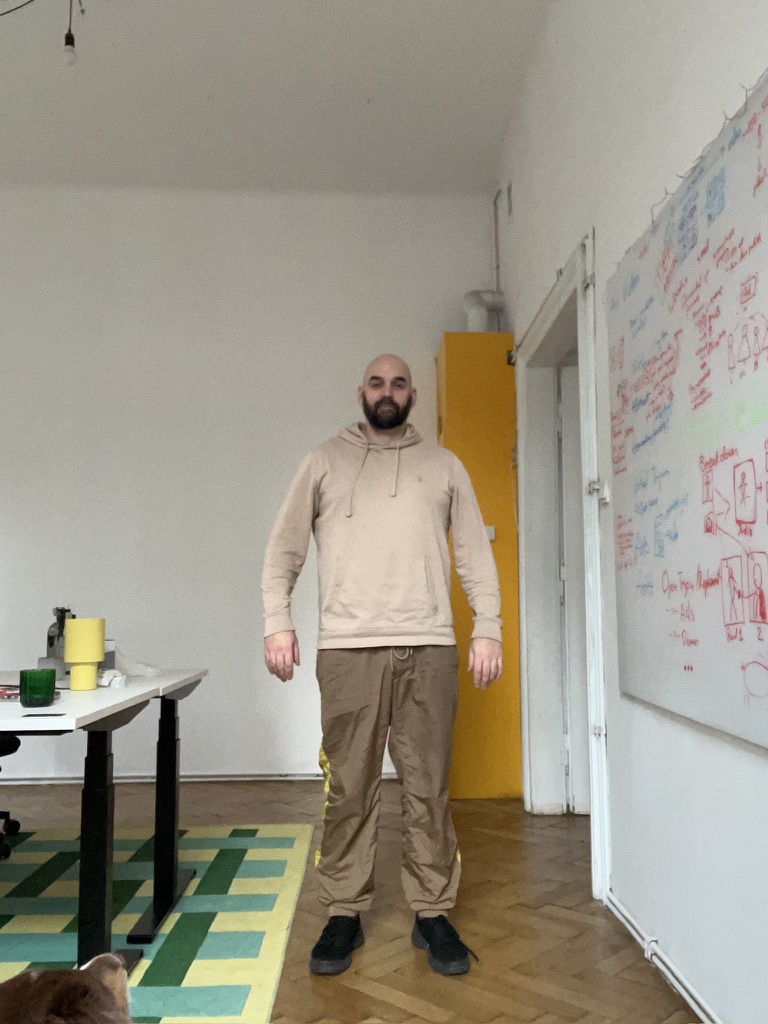

In [3]:
selfie_image = openvto.example.person(kind="selfie", i=1, return_type="pil")
posture_image = openvto.example.person(kind="posture", i=1, return_type="pil")

display(selfie_image, posture_image)

# Step 2: Generate Avatar

First with need to generate an avatar which will be used as a base for the try-on.

To create an avatar, we need to call `generate_avatar()` with our images.

We will also pass a `return_type` parameter to get the avatar as a PIL Image.


✓ Avatar generated!


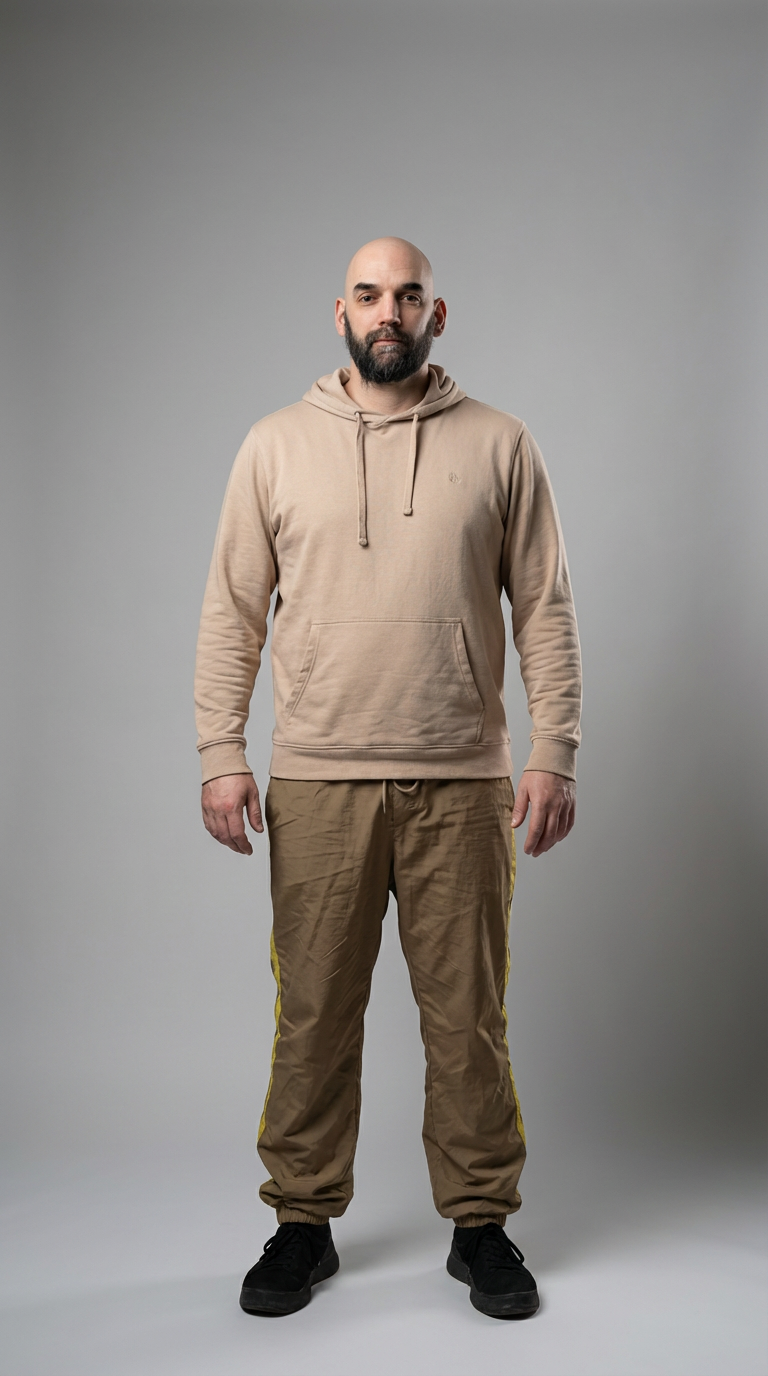

In [ ]:
avatar_image = vto.generate_avatar(
    selfie=selfie_image,
    posture=posture_image,
    return_type="pil"
)

print("✓ Avatar generated!")
display(avatar_image)

---

# Part 2: Virtual Try-On
## Step 1: Select clothing items

We need to select the clothing items we want to try on.

Let's use the example images from the package again.

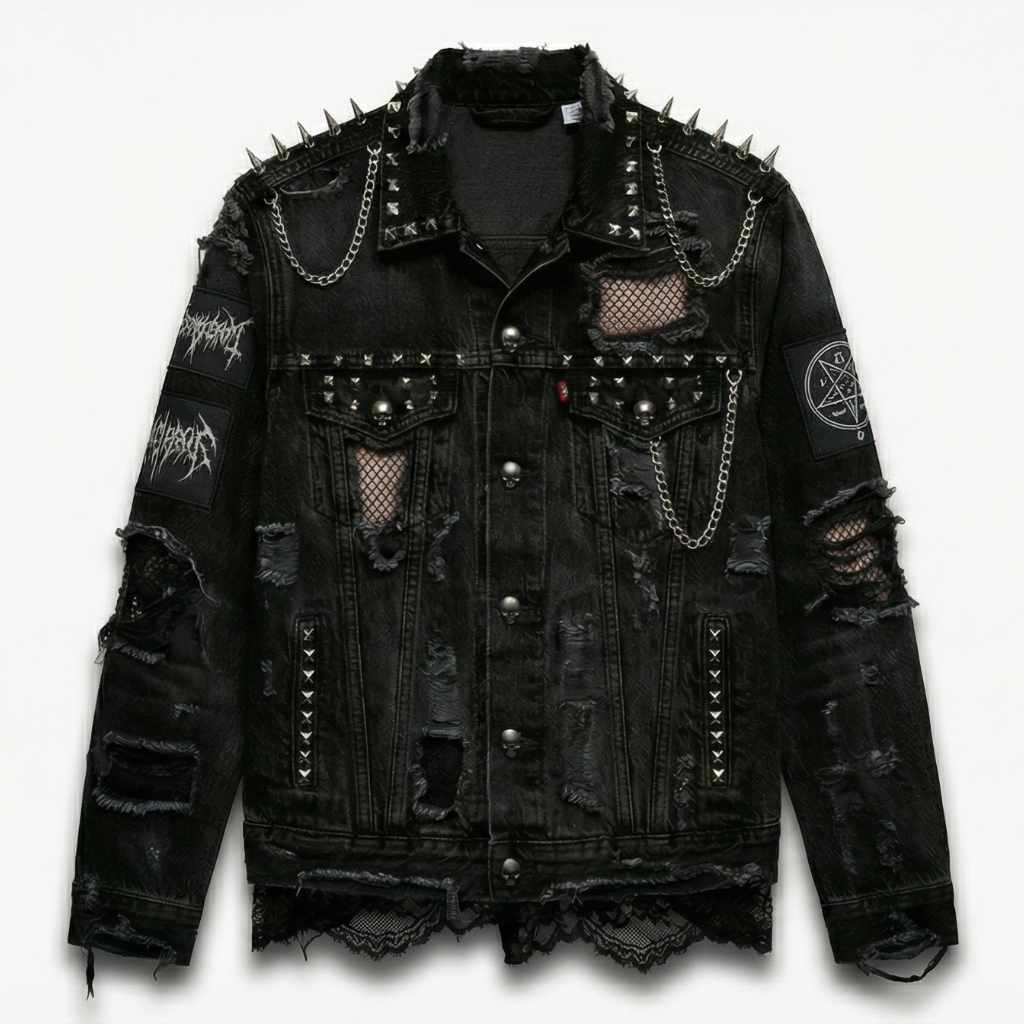

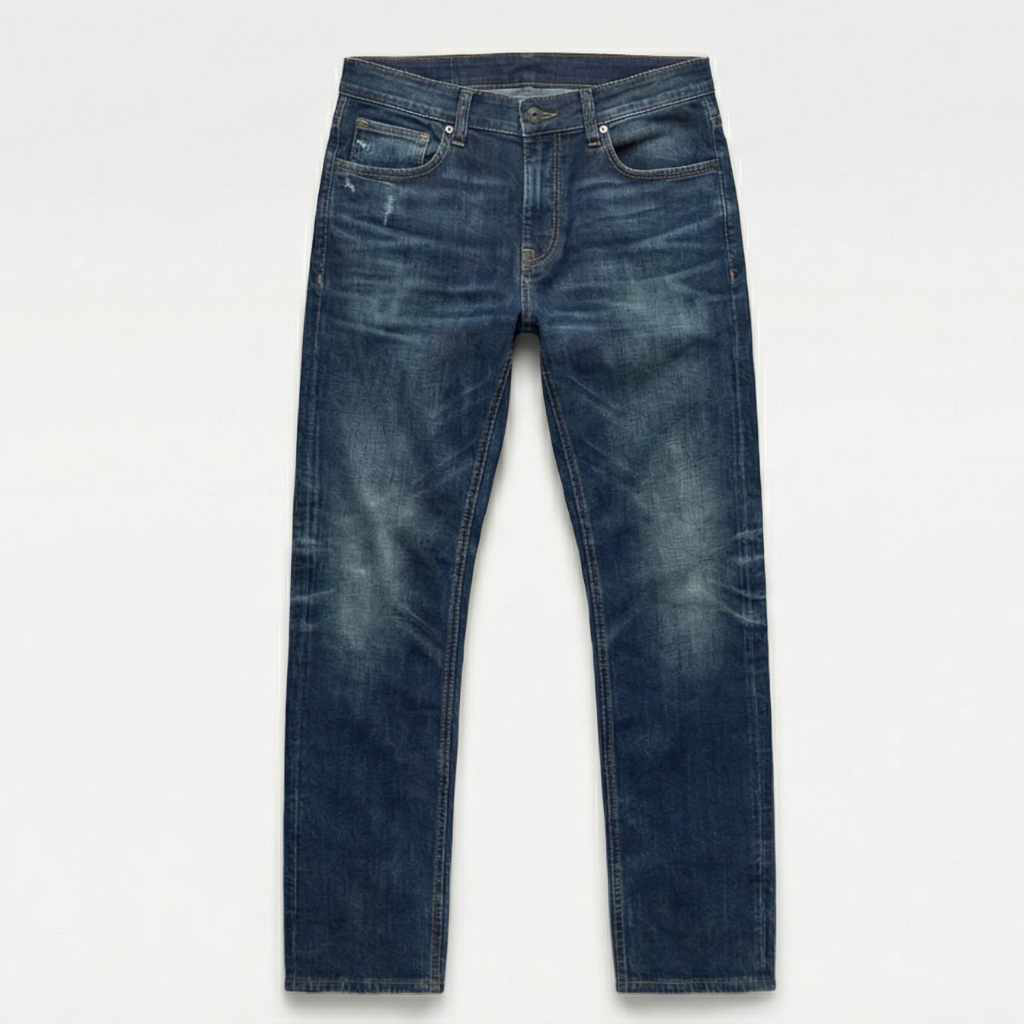

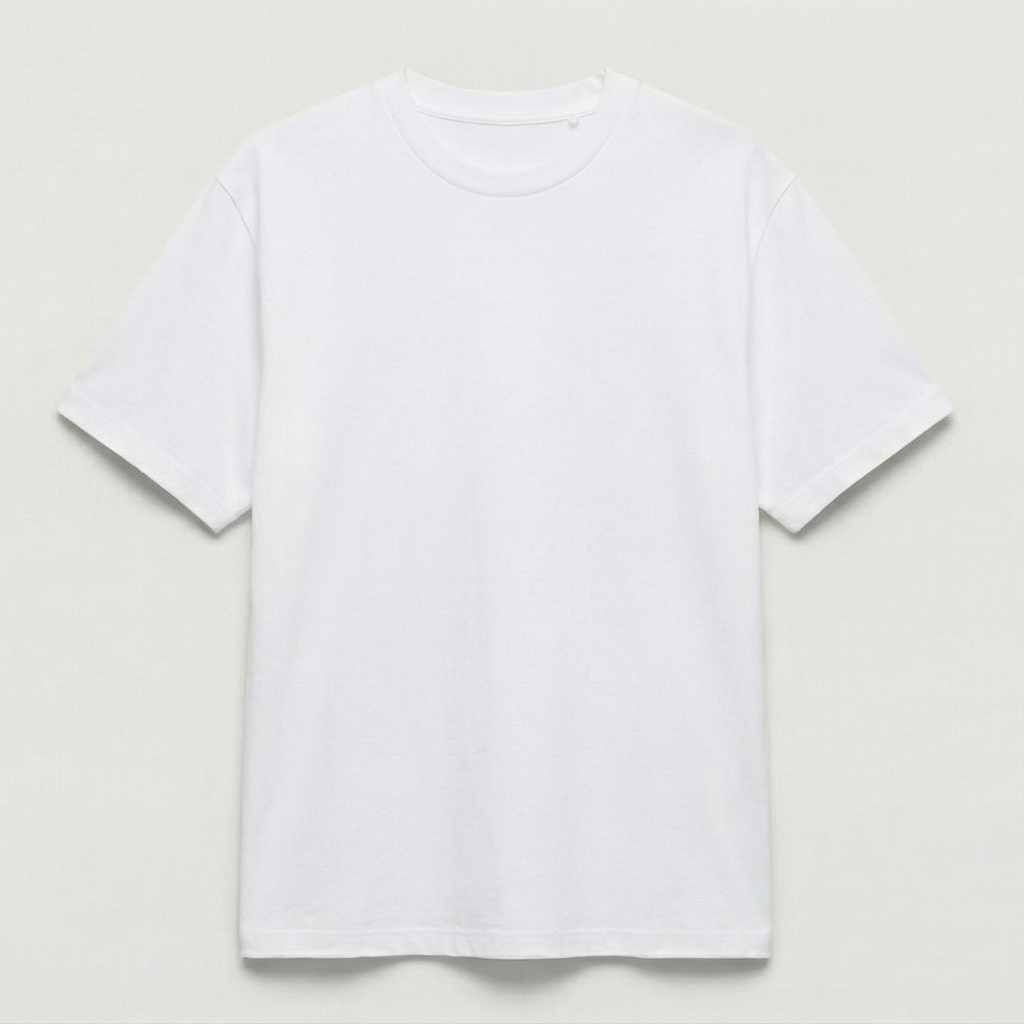

In [6]:
jacket_image = openvto.example.clothes(category="jackets", view="front", i=2, return_type="pil")
pants_image = openvto.example.clothes(category="pants", view="front", i=1, return_type="pil")
shirt_image = openvto.example.clothes(category="shirts", view="front", i=3, return_type="pil")

display(jacket_image, pants_image, shirt_image)

## Step 2: Generate static Try-On

Let's apply the clothing to the avatar, to do that we need to call `generate_tryon()` with the avatar and the clothing items.

✓ Try-on generated!


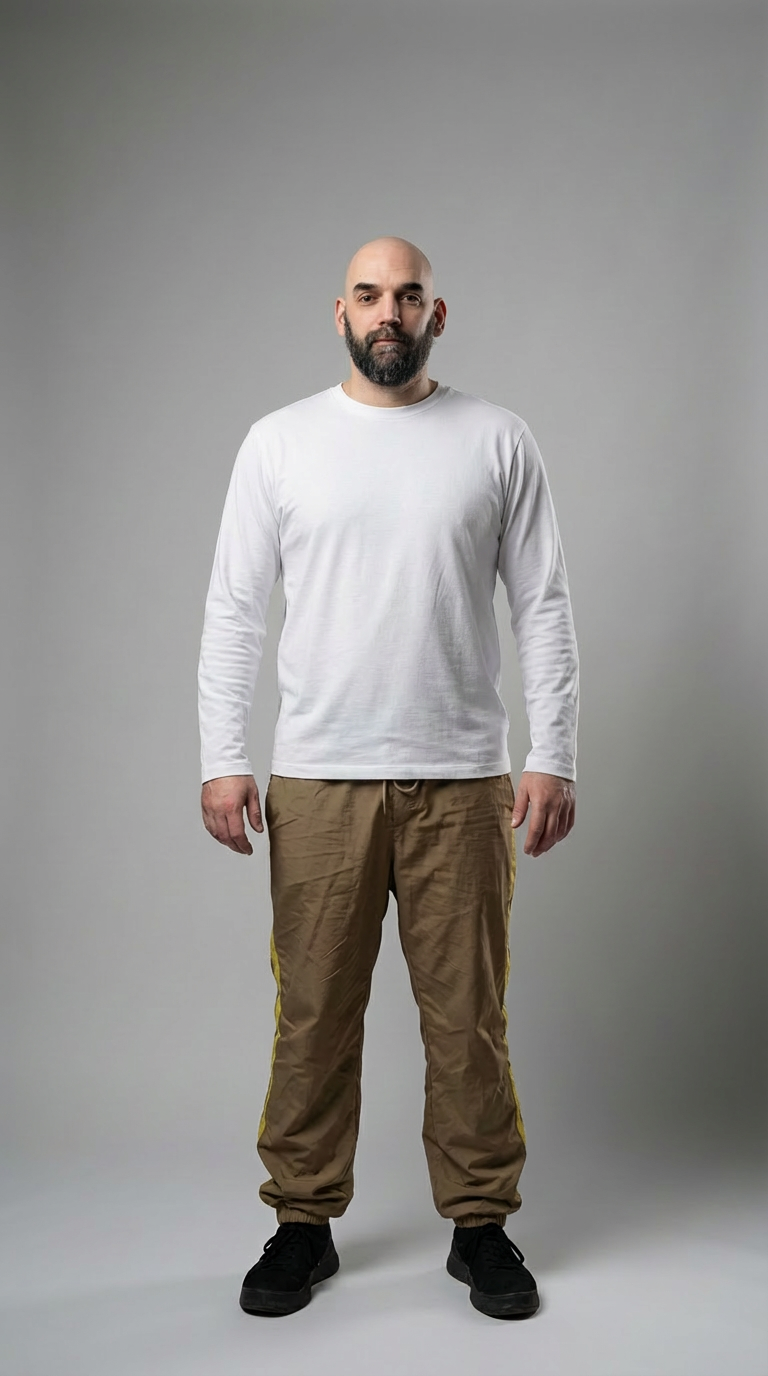

In [13]:
tryon_image = vto.generate_tryon(
    avatar=avatar_image,
    clothes=[shirt_image],
    # styling={"shirt": "stretchy material, tight fit, no loose folds"},
    # styling={"shirt": "oversized, baggy, loose fit, knee length"},
    # styling={"shirt": "regular fit, sleeves are long and reach middle of theforearm"},
    styling={"shirt": "regular fit, long sleeve"},
    return_type="pil"
)

print("✓ Try-on generated!")
display(tryon_image)

---

# Part 3: Video Loop Generation

To generate a video loop, we need to call `generate_videoloop()` with the try-on result and select the motion mode.

Let's generate a video loop with the try-on result and the "turn_360" motion mode.

In [7]:
video_result = vto.generate_videoloop(
    static_image=tryon_image,
    mode="turn_360",
    return_type="b64"
)

print("✓ Video generated!")
HTML(f'''
<video width="360" height="640" controls autoplay loop>
  <source src="data:video/mp4;base64,{video_result}" type="video/mp4">
</video>
''')

✓ Video generated!
